In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\jajohns\Files\Publishing\open_principles_of_microeconomics\open_principles_of_microeconomics_dev\open_principles_of_microeconomics':
  os.chdir(r'C:\Users\jajohns\Files\Publishing\open_principles_of_microeconomics\open_principles_of_microeconomics_dev\open_principles_of_microeconomics')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\jajohns\AppData\Local\Temp\ipykernel_36176\3272803116.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\importlib\\_bootstrap.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\importlib\\_bootstrap_external.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\codecs.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\encodings\\aliases.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\encodings\\__init__.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\encodings\\utf_8.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\abc.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\io.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\stat.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\_collections_abc.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\env2023a\\lib\\genericpath.py": 1675771545.0, "C:\\Users\\jajohns\\mambaforge\\envs\\

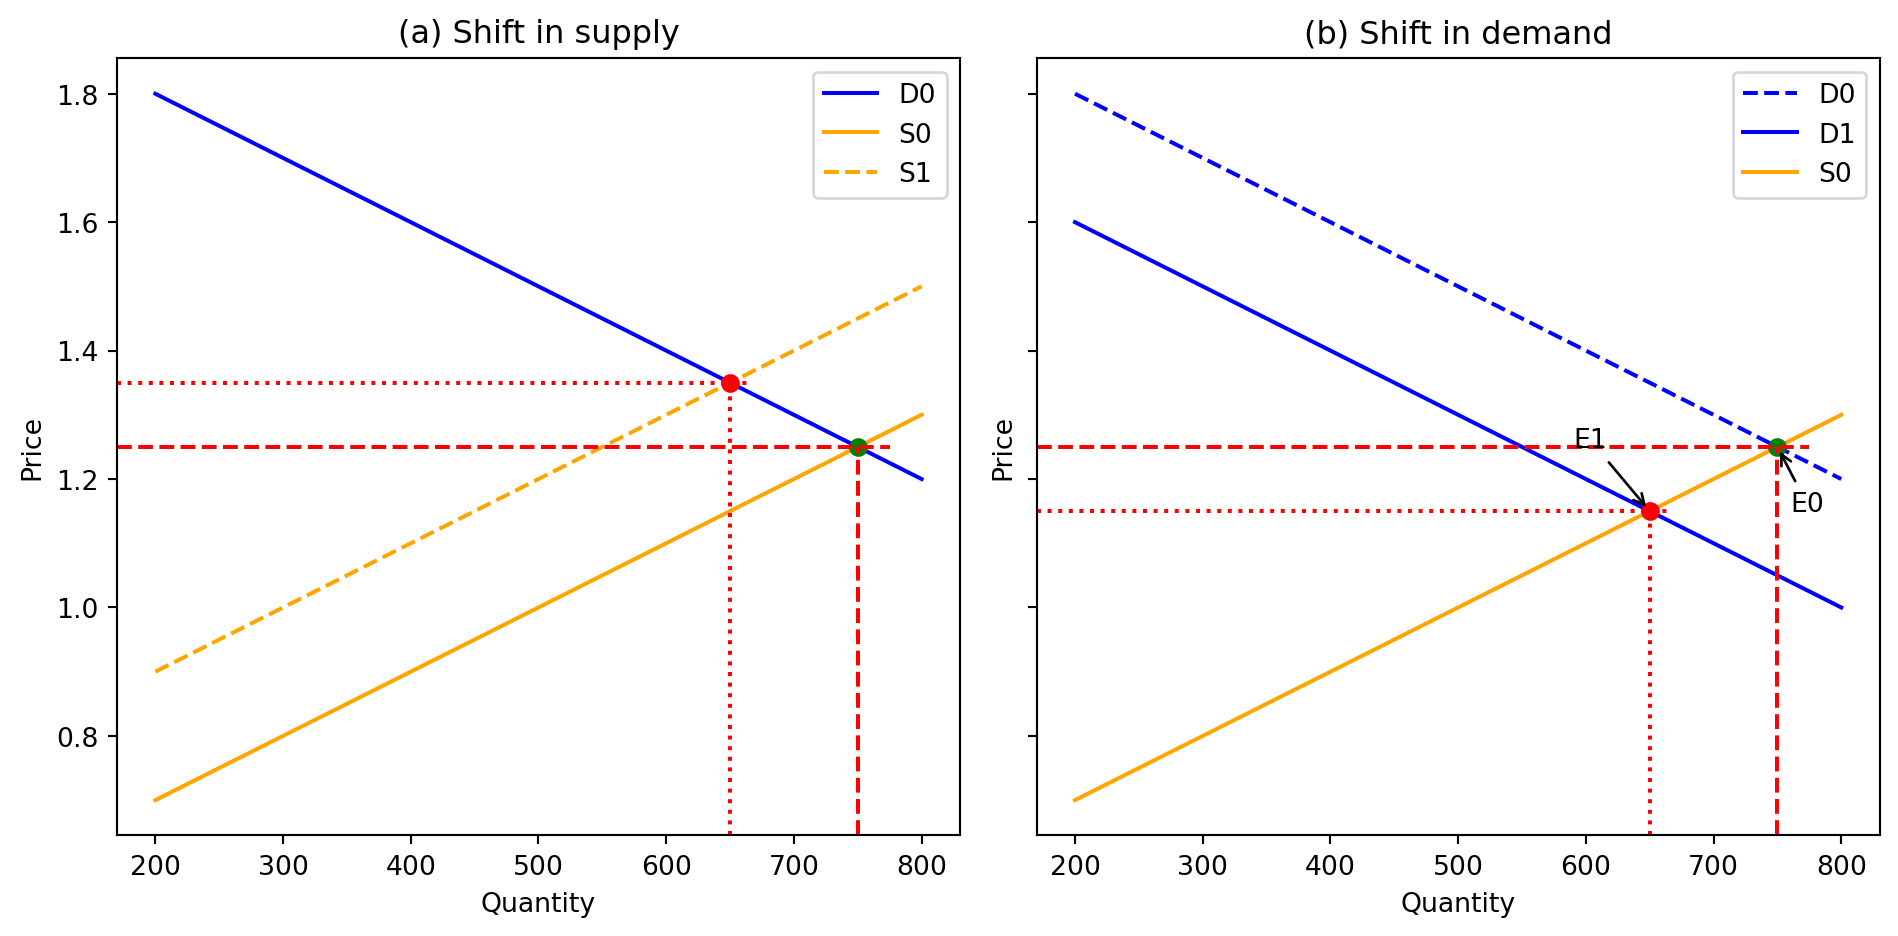

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Generate the graphs for shifts in supply and demand

# Define the original demand and supply curves
def original_demand(quantity):
    return 2.0 - 0.001 * quantity

def original_supply(quantity):
    return 0.5 + 0.001 * quantity

# Define the new demand and supply curves after the shift
def new_demand(quantity):
    return 1.8 - 0.001 * quantity

def new_supply(quantity):
    return 0.7 + 0.001 * quantity

# Create an array of quantities
quantity = np.linspace(200, 800, 100)

# Generate the corresponding prices for original and new curves
original_demand_price = original_demand(quantity)
new_demand_price = new_demand(quantity)
original_supply_price = original_supply(quantity)
new_supply_price = new_supply(quantity)

# Find the equilibrium points for original and new curves
original_equilibrium_quantity = (2.0 - 0.5) / (0.001 + 0.001)
original_equilibrium_price = original_demand(original_equilibrium_quantity)

new_equilibrium_quantity_supply = (2.0 - 0.7) / (0.001 + 0.001)
new_equilibrium_price_supply = original_demand(new_equilibrium_quantity_supply)

new_equilibrium_quantity_demand = (1.8 - 0.5) / (0.001 + 0.001)
new_equilibrium_price_demand = new_demand(new_equilibrium_quantity_demand)

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


# Annotate the equilibrium points
axs[1].annotate('E0', 
                xy=(original_equilibrium_quantity, original_equilibrium_price), 
                xytext=(original_equilibrium_quantity + 10, original_equilibrium_price - 0.1),
                arrowprops=dict(facecolor='black', arrowstyle='->'))
axs[1].annotate('E1', 
                xy=(new_equilibrium_quantity_demand, new_equilibrium_price_demand), 
                xytext=(new_equilibrium_quantity_demand - 60, new_equilibrium_price_demand + 0.1),
                arrowprops=dict(facecolor='black', arrowstyle='->'))





# Plot for supply shift
axs[0].plot(quantity, original_demand_price, label='D0', color='blue')
axs[0].plot(quantity, original_supply_price, label='S0', color='orange')
axs[0].plot(quantity, new_supply_price, label='S1', color='orange', linestyle='--')
axs[0].plot(original_equilibrium_quantity, original_equilibrium_price, 'o', color='green')
axs[0].plot(new_equilibrium_quantity_supply, new_equilibrium_price_supply, 'o', color='red')
axs[0].axhline(y=original_equilibrium_price, color='r', linestyle='--', xmax=(original_equilibrium_quantity-200)/600)
axs[0].axvline(x=original_equilibrium_quantity, color='r', linestyle='--', ymax=(original_equilibrium_price-0.5)/1.5)
axs[0].axhline(y=new_equilibrium_price_supply, color='r', linestyle=':', xmax=(new_equilibrium_quantity_supply-200)/600)
axs[0].axvline(x=new_equilibrium_quantity_supply, color='r', linestyle=':', ymax=(new_equilibrium_price_supply-0.5)/1.5)

# Plot for demand shift
axs[1].plot(quantity, original_demand_price, label='D0', color='blue', linestyle='--')
axs[1].plot(quantity, new_demand_price, label='D1', color='blue')
axs[1].plot(quantity, original_supply_price, label='S0', color='orange')
axs[1].plot(original_equilibrium_quantity, original_equilibrium_price, 'o', color='green')
axs[1].plot(new_equilibrium_quantity_demand, new_equilibrium_price_demand, 'o', color='red')
axs[1].axhline(y=original_equilibrium_price, color='r', linestyle='--', xmax=(original_equilibrium_quantity-200)/600)
axs[1].axvline(x=original_equilibrium_quantity, color='r', linestyle='--', ymax=(original_equilibrium_price-0.5)/1.5)
axs[1].axhline(y=new_equilibrium_price_demand, color='r', linestyle=':', xmax=(new_equilibrium_quantity_demand-200)/600)
axs[1].axvline(x=new_equilibrium_quantity_demand, color='r', linestyle=':', ymax=(new_equilibrium_price_demand-0.5)/1.5)

# Set titles and labels
axs[0].set_title('(a) Shift in supply')
axs[1].set_title('(b) Shift in demand')
for ax in axs:
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Price')
    ax.legend()

# Show the plots
plt.tight_layout()
plt.show()